<a href="https://colab.research.google.com/github/arunsprasad/yfcc_tensorflow_beginners/blob/master/yfcc_02_01_CoreLearningAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install sklearn

In [0]:
%tensorflow_version 2.x

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [0]:
# load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [0]:
print(dftrain.head())
print(dftrain.describe())
print(dftrain.shape)
print(y_train.head())

      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]
              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000

In [0]:
print(dfeval.head())
print(dfeval.describe())
print(dfeval.shape)

      sex   age  n_siblings_spouses  parch  ...   class     deck  embark_town alone
0    male  35.0                   0      0  ...   Third  unknown  Southampton     y
1    male  54.0                   0      0  ...   First        E  Southampton     y
2  female  58.0                   0      0  ...   First        C  Southampton     y
3  female  55.0                   0      0  ...  Second  unknown  Southampton     y
4    male  34.0                   0      0  ...  Second        D  Southampton     y

[5 rows x 9 columns]
              age  n_siblings_spouses       parch        fare
count  264.000000          264.000000  264.000000  264.000000
mean    28.720985            0.469697    0.386364   27.023880
std     14.157538            0.978393    0.837775   34.973108
min      0.420000            0.000000    0.000000    0.000000
25%     21.000000            0.000000    0.000000    7.925000
50%     28.000000            0.000000    0.000000   13.250000
75%     35.250000            1.000000   

*Graph:*
--------

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


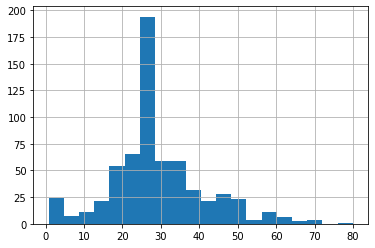

In [0]:
print(dftrain.age)
dftrain.age.hist(bins=20)

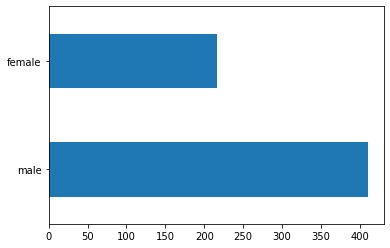

In [0]:
dftrain.sex.value_counts().plot(kind='barh')

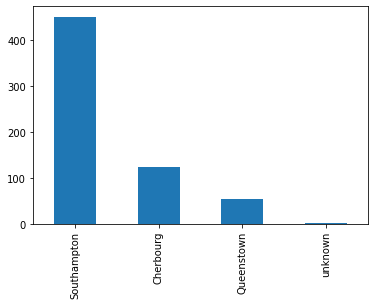

In [0]:
dftrain.embark_town.value_counts().plot(kind='bar')

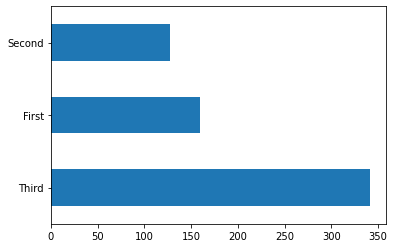

In [0]:
dftrain['class'].value_counts().plot(kind='barh')

In [0]:
print(dftrain['class'].value_counts())

Third     341
First     159
Second    127
Name: class, dtype: int64


        sex   age  n_siblings_spouses  ...  embark_town  alone survived
0      male  22.0                   1  ...  Southampton      n        0
1    female  38.0                   1  ...    Cherbourg      n        1
2    female  26.0                   0  ...  Southampton      y        1
3    female  35.0                   1  ...  Southampton      n        1
4      male  28.0                   0  ...   Queenstown      y        0
..      ...   ...                 ...  ...          ...    ...      ...
622    male  28.0                   0  ...  Southampton      y        0
623    male  25.0                   0  ...  Southampton      y        0
624  female  19.0                   0  ...  Southampton      y        1
625  female  28.0                   1  ...  Southampton      n        0
626    male  32.0                   0  ...   Queenstown      y        0

[627 rows x 10 columns]
Text(0.5, 0, '% survive')


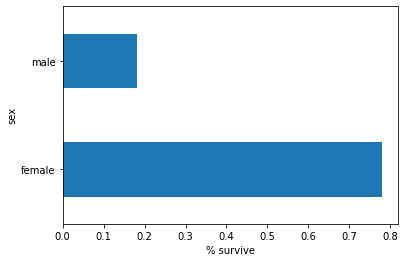

In [0]:
print(pd.concat([dftrain, y_train], axis=1))
print(pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive'))

Text(0.5, 0, '% n_siblings_spouses')

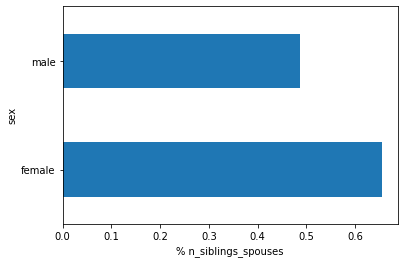

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').n_siblings_spouses.mean().plot(kind='barh').set_xlabel('% n_siblings_spouses')





**Training vs Testing Data:**

In [31]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERICAL_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  print(vocabulary)
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4]
['Third' 'First' 'Second']
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg'